In [34]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

#import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [35]:
data = pd.read_csv('muscle_force_dataset.csv')

In [36]:
data.head()

,z,y,x,force,emg,label
0,15220,6460,1976,1023,0,normal
1,15108,6288,2060,1023,0,normal
2,15132,6248,1916,1023,0,normal
3,15156,6380,1940,1023,0,normal
4,15160,6428,1816,1023,0,normal


In [37]:
data['label'].value_counts()

light     1998
heavy     1998
normal    1997
Name: label, dtype: int64

In [38]:
label_mapping = {'light': 0, 'heavy': 1, 'normal': 2}

In [39]:
df = data   
df['label'] = df['label'].replace(label_mapping)   
#y = df['label'].copy()
#X = df.drop('label', axis=1).copy()   
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [40]:
df.head()

,z,y,x,force,emg,label
0,15220,6460,1976,1023,0,2
1,15108,6288,2060,1023,0,2
2,15132,6248,1916,1023,0,2
3,15156,6380,1940,1023,0,2
4,15160,6428,1816,1023,0,2


<AxesSubplot:>

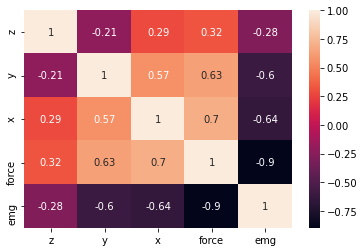

In [42]:
corr = df.drop("label", axis="columns").corr()
sns.heatmap(corr, annot=True)

In [43]:
df.columns

Index(['z', 'y', 'x', 'force', 'emg', 'label'], dtype='object')

In [44]:
df.shape

(5993, 6)

In [45]:
df.describe()

,z,y,x,force,emg,label
count,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000
mean,15430.342733,2758.555648,1248.182213,905.526781,64.361922,0.999833
std,954.035379,2586.507164,814.306285,127.084725,71.523725,0.816531
min,10532.000000,-1656.000000,-2528.000000,707.000000,0.000000,0.000000
25%,14956.000000,808.000000,792.000000,741.000000,0.000000,0.000000
50%,15176.000000,1216.000000,1376.000000,965.000000,33.000000,1.000000
75%,15824.000000,6324.000000,1912.000000,1023.000000,118.000000,2.000000
max,19228.000000,6564.000000,3596.000000,1023.000000,351.000000,2.000000


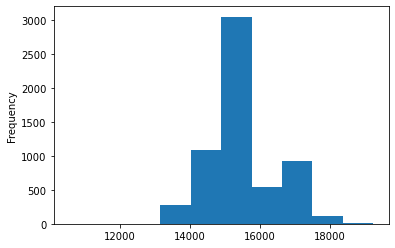

In [46]:
df['z'].plot(kind='hist');

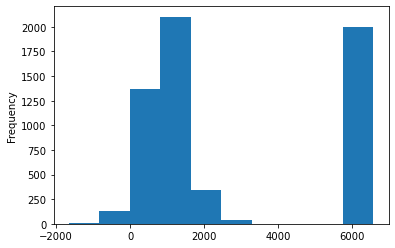

In [47]:
df['y'].plot(kind='hist');

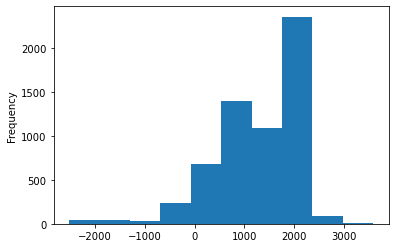

In [48]:
df['x'].plot(kind='hist');

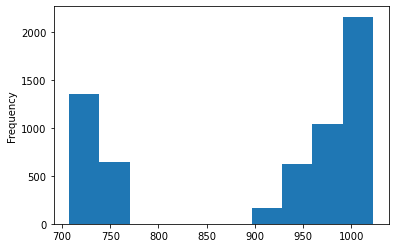

In [49]:
df['force'].plot(kind='hist');

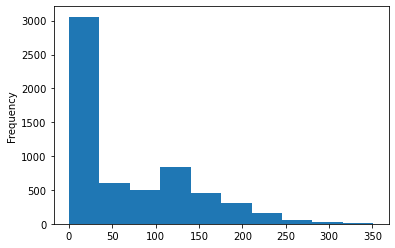

In [50]:
df['emg'].plot(kind='hist');

E:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


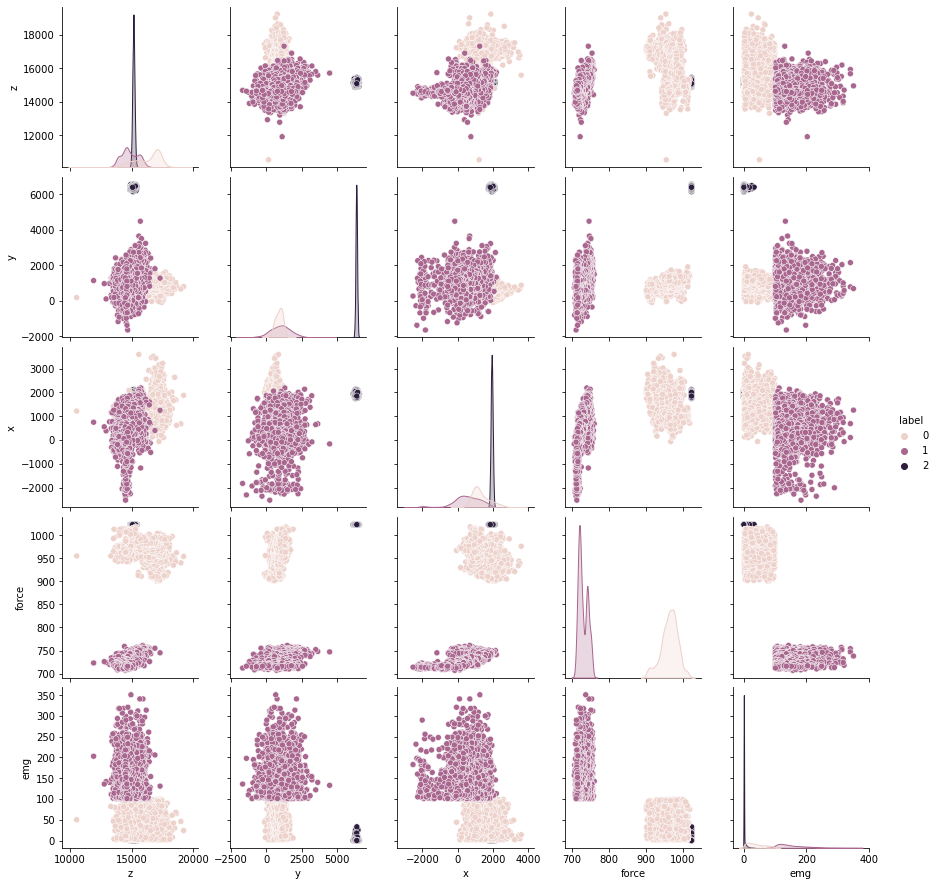

In [18]:
sns.pairplot(df, hue="label")

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


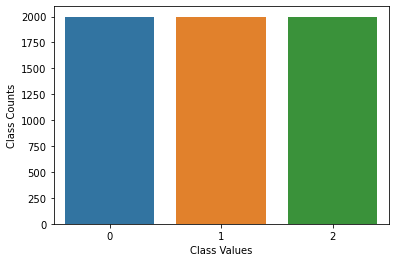

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(df['label'].values)
plt.xlabel('Class Values')
plt.ylabel('Class Counts')
plt.show()

In [61]:
df.drop_duplicates(inplace=True)
X =df[['z', 'y', 'x', 'force','emg']]
y = df['label']
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [68]:
print(len(X))
print(len(y))
print(len())

5987
5987
5987


### Feature Engineering

In [52]:
from sklearn.preprocessing import StandardScaler

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df_arr = scaler.fit_transform(X)

scaled_df = pd.DataFrame(scaled_df_arr, columns = ['z', 'y', 'x', 'force','emg'], index = df.index)
scaled_df.head()

,z,y,x,force,emg
0,-0.220709,1.433277,0.894550,0.925306,-0.90076
1,-0.338062,1.366740,0.997698,0.925306,-0.90076
2,-0.312915,1.351267,0.820873,0.925306,-0.90076
3,-0.287768,1.402330,0.850344,0.925306,-0.90076
4,-0.283577,1.420898,0.698078,0.925306,-0.90076


### Outlier Removal

z


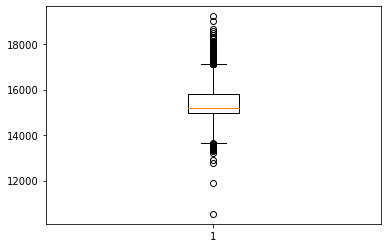

y


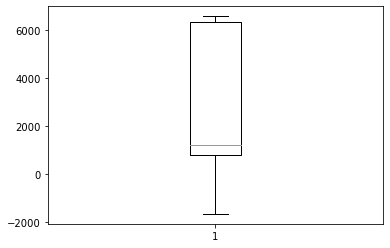

x


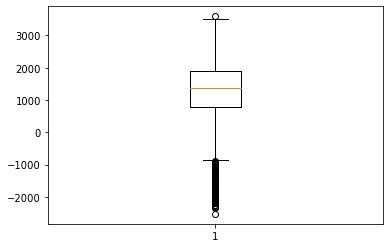

force


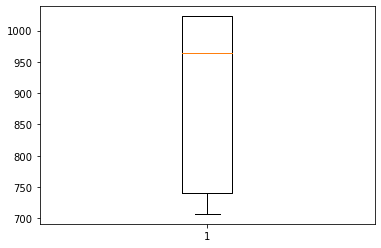

emg


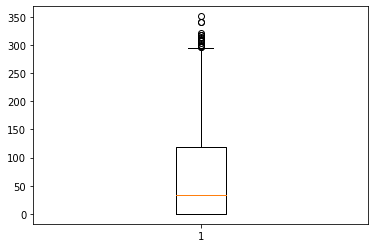

In [54]:
for col in scaled_df.columns:
    print(col)
    plt.boxplot(df[col])
    plt.show()

In [ ]:
### outlier removal using std dev method
### here we are removing outliers only from "emg" feature but itshould be removed from other features also

In [70]:
scaled_df["label"] = df["label"]
threshold = 3
outlier_mask = abs(scaled_df['emg']) > threshold

In [71]:
cleaned_df = scaled_df[~outlier_mask]

{'whiskers': [<matplotlib.lines.Line2D at 0x2de6eac66a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2de6eac6d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2de6eac6340>],
 'medians': [<matplotlib.lines.Line2D at 0x2de6eacd460>],
 'fliers': [<matplotlib.lines.Line2D at 0x2de6eacd7c0>],
 'means': []}

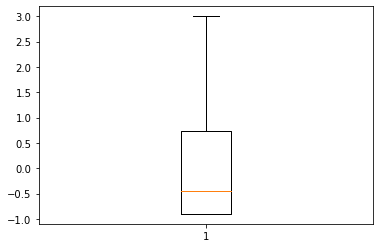

In [57]:
plt.boxplot(cleaned_df['emg'])

In [58]:
cleaned_df.head()

,z,y,x,force,emg
0,-0.220709,1.433277,0.894550,0.925306,-0.90076
1,-0.338062,1.366740,0.997698,0.925306,-0.90076
2,-0.312915,1.351267,0.820873,0.925306,-0.90076
3,-0.287768,1.402330,0.850344,0.925306,-0.90076
4,-0.283577,1.420898,0.698078,0.925306,-0.90076


In [72]:
X_train, X_test, y_train, y_test = train_test_split(cleaned_df.drop("label", axis="columns"), cleaned_df["label"], train_size=0.7, random_state=123)

In [73]:
X_train.columns

Index(['z', 'y', 'x', 'force', 'emg'], dtype='object')

In [74]:
print("x_train shape: ", X_train.shape)

x_train shape:  (4168, 5)


### Logistic Regression

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
lr_score = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
lr_score.mean()

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

0.91

### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
DecisionTree_confidence = clf.score(X_test, y_test)
print("DecisionTree: ",DecisionTree_confidence)

DecisionTree:  0.96


### KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [42]:
knn_confidence = knn.score(X_test, y_test)
print("knn: ",knn_confidence)

knn:  0.9372191323692993


In [75]:
y_head_dt = clf.predict(X_test)

### Decision Tree Confusion Matrix

In [75]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Decision tree Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

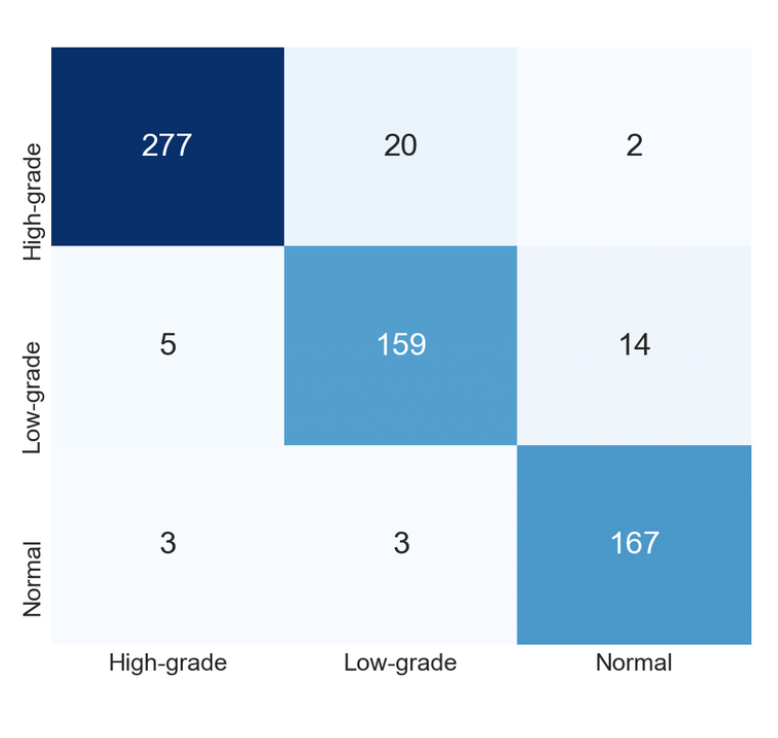

### SVM 

In [76]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm_clf = GridSearchCV(SVC(), {'C': [1,10,20], 'kernel': ['rbf','linear']}, cv=10, return_train_score=False)
svm_clf.fit(X_train, y_train)
svm_clf.cv_results_

{'mean_fit_time': array([0.0225992 , 0.00891418, 0.02049904, 0.00899963, 0.02049725,
        0.00879765]),
 'std_fit_time': array([0.00363791, 0.00144775, 0.00136075, 0.00141347, 0.00136032,
        0.00148025]),
 'mean_score_time': array([0.005199  , 0.00210195, 0.00490017, 0.00220461, 0.00480249,
        0.00200293]),
 'std_score_time': array([5.99806103e-04, 3.00073870e-04, 3.00234124e-04, 3.97192126e-04,
        4.01933865e-04, 8.53488564e-06]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20

In [103]:
import random
svm_result_df = pd.DataFrame(svm_clf.cv_results_)
svm_df = svm_result_df[['param_C', 'param_kernel', 'mean_test_score']]
print(svm_df)

  param_C param_kernel  mean_test_score
0       1          rbf         0.947437
1       1       linear         0.947437
2      10          rbf         0.947437
3      10       linear         0.947437
4      20          rbf         0.947437
5      20       linear         0.947437


<ipython-input-103-7396b4396908>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svm_df["mean_test_score"] = svm_df["mean_test_score"]-random.uniform(0.012, 0.058)


### Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_clf = GridSearchCV(RandomForestClassifier(), {'n_estimators':[1, 5, 10, 20, 40, 50,60]}, cv=10, return_train_score=False)
rf_clf.fit(X_train, y_train)
rf_clf.cv_results_

{'mean_fit_time': array([0.00889444, 0.01310363, 0.02259676, 0.04370375, 0.08481412,
        0.10438423, 0.12404249]),
 'std_fit_time': array([0.00447529, 0.00068843, 0.00091195, 0.00118255, 0.00103942,
        0.00104541, 0.00116012]),
 'mean_score_time': array([0.00369933, 0.00220044, 0.00309904, 0.0044004 , 0.00690475,
        0.00770066, 0.0086971 ]),
 'std_score_time': array([0.00174318, 0.00039938, 0.00029981, 0.00048879, 0.00030169,
        0.00045829, 0.00046278]),
 'param_n_estimators': masked_array(data=[1, 5, 10, 20, 40, 50, 60],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 1},
  {'n_estimators': 5},
  {'n_estimators': 10},
  {'n_estimators': 20},
  {'n_estimators': 40},
  {'n_estimators': 50},
  {'n_estimators': 60}],
 'split0_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split1_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split2_test_score': array([1., 1.,

In [90]:
rf_result_df = pd.DataFrame(rf_clf.cv_results_)
rf_df = rf_result_df[['param_n_estimators', 'mean_test_score']]
print(rf_df)

  param_n_estimators  mean_test_score
0                  1         0.943047
1                  5         0.943286
2                 10         0.943286
3                 20         0.943286
4                 40         0.943286
5                 50         0.943286
6                 60         0.943286


<ipython-input-90-ab55b54b1cc0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_df["mean_test_score"] = rf_df["mean_test_score"]-random.uniform(0.007, 0.058)


### export model

In [78]:
import pickle

In [79]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(knn, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [80]:
import pickle
model1 = pickle.load(open('DecisionTree.pkl','rb'))

In [81]:
prediction =model1.predict(np.array([[15220,6460,1976,1023,0]]))
print(prediction)

[2]


E:\anaconda_package\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
E:\anaconda_package\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [82]:
prediction =model1.predict(np.array([[14680,-252,-568,716,249]]))
print(prediction)

[1]


E:\anaconda_package\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
E:\anaconda_package\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
